In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.filters import gabor
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


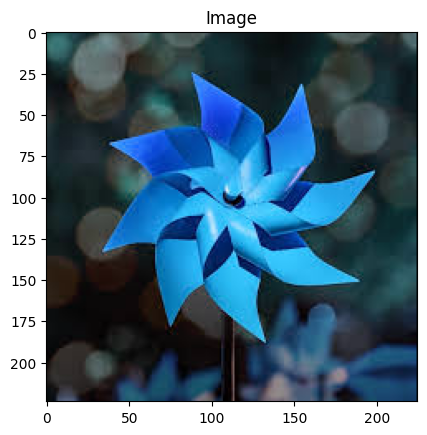

In [9]:
i_image = "pic.jpg"
img = cv2.imread(i_image)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.show()


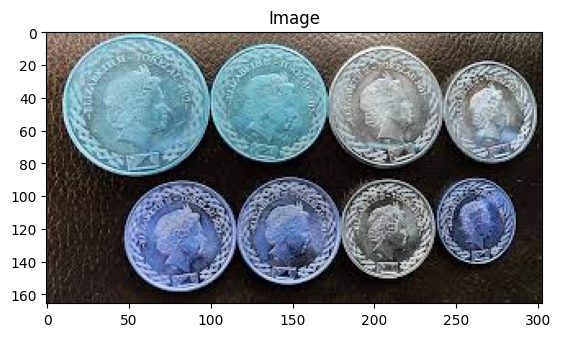

In [10]:

# Load image
i_image = "picme.jpg"
img_1 = cv2.imread(i_image)
plt.imshow(img_1, cmap='gray')
plt.title('Image')
plt.show()

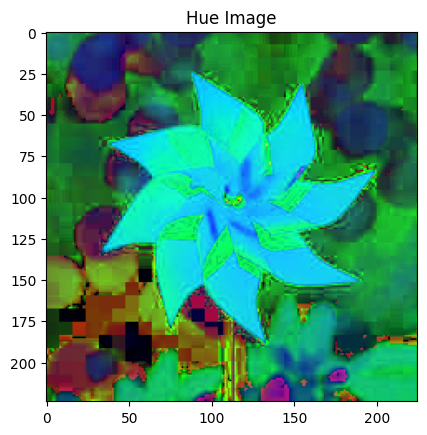

In [11]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img, cmap='gray')
plt.title('Hue Image')
plt.show()


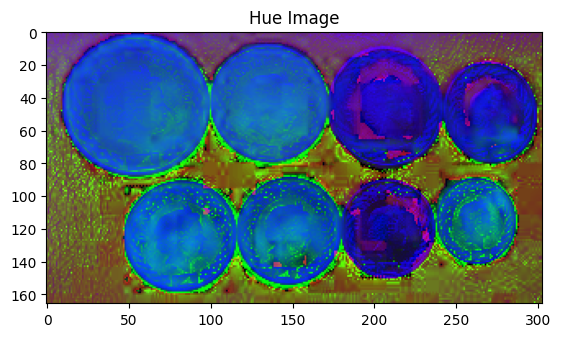

In [12]:
hsv_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img_1, cmap='gray')
plt.title('Hue Image')
plt.show()

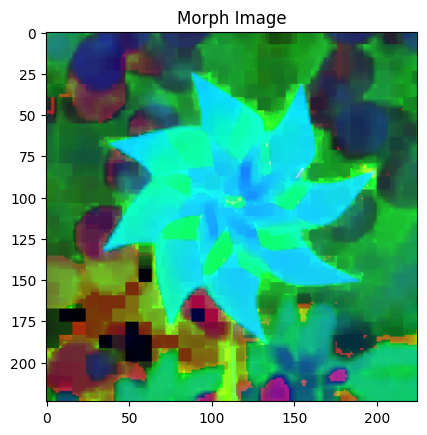

In [13]:
kernel = np.ones((5,5), np.uint8)
morph_img = cv2.morphologyEx(hsv_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img, cmap='gray')
plt.title('Morph Image')
plt.show()

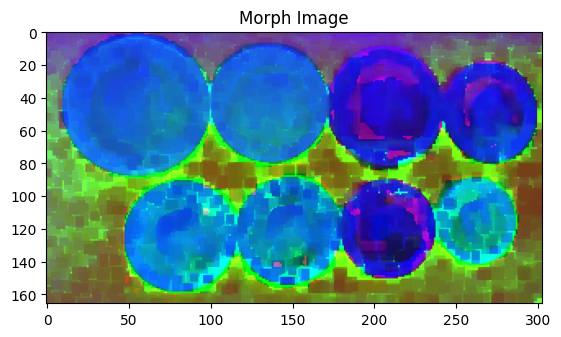

In [14]:
kernel = np.ones((5,5), np.uint8)
morph_img_1 = cv2.morphologyEx(hsv_img_1, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img_1, cmap='gray')
plt.title('Morph Image')
plt.show()

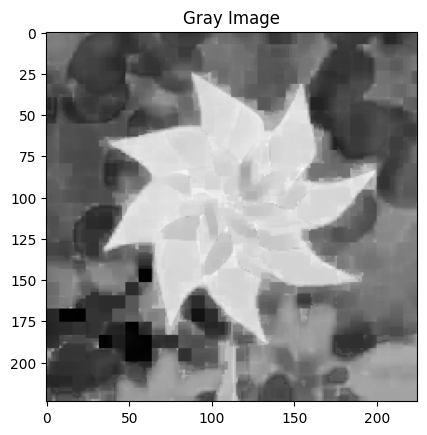

In [15]:
gray_img = cv2.cvtColor(morph_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Image')
plt.show()


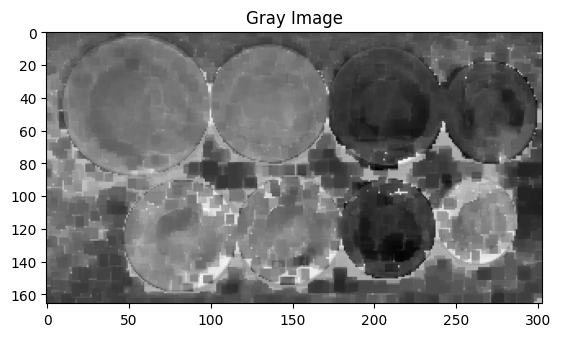

In [16]:
gray_img_1 = cv2.cvtColor(morph_img_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img_1, cmap='gray')
plt.title('Gray Image')
plt.show()


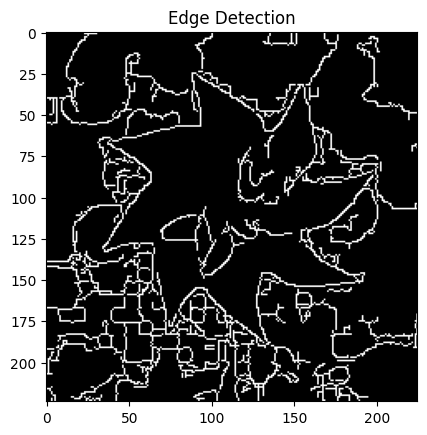

In [17]:
edges = cv2.Canny(gray_img, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()



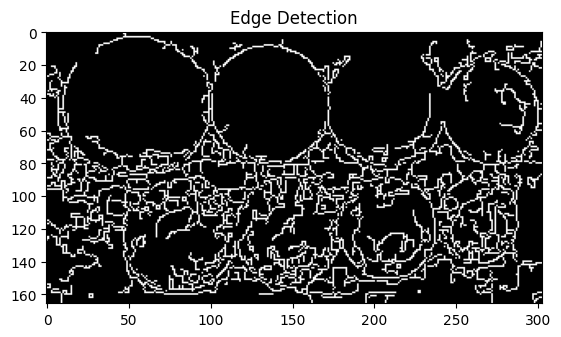

In [18]:
edges_1 = cv2.Canny(gray_img_1, 50, 150)
plt.imshow(edges_1, cmap='gray')
plt.title('Edge Detection')
plt.show()

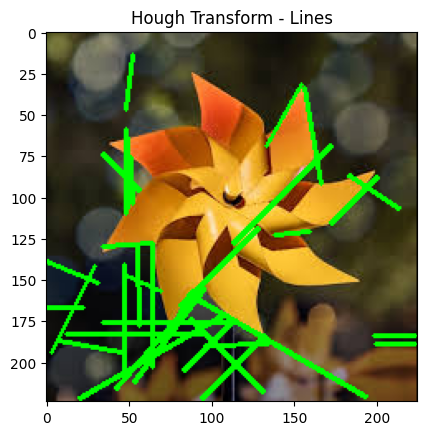

In [19]:
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Lines')
plt.show()


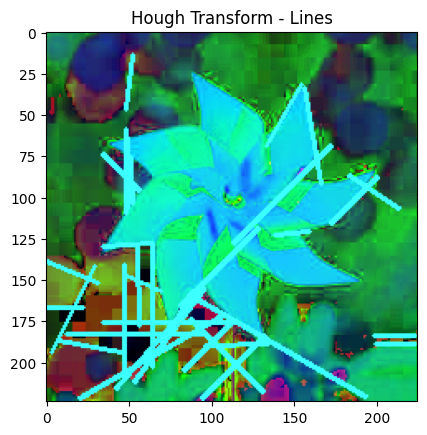

In [20]:
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Lines')
plt.show()


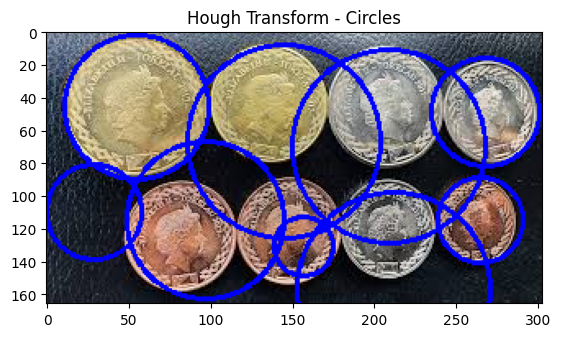

In [21]:
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img_1, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Circles')
plt.show()

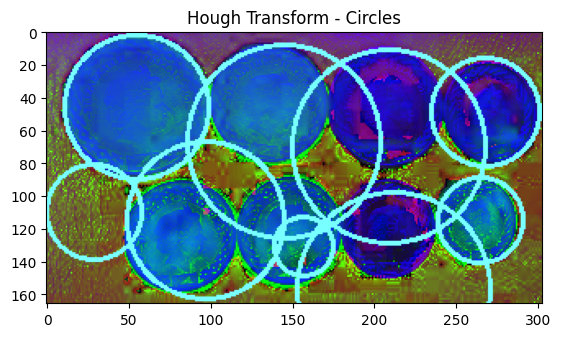

In [22]:
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img_1, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Circles')
plt.show()

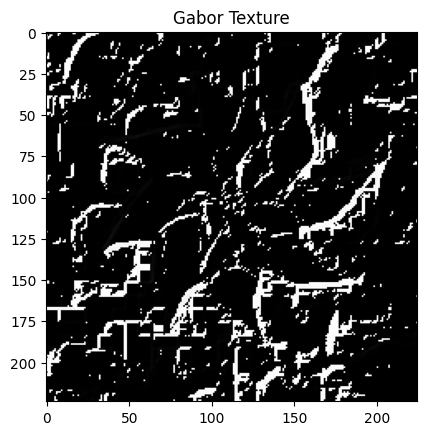

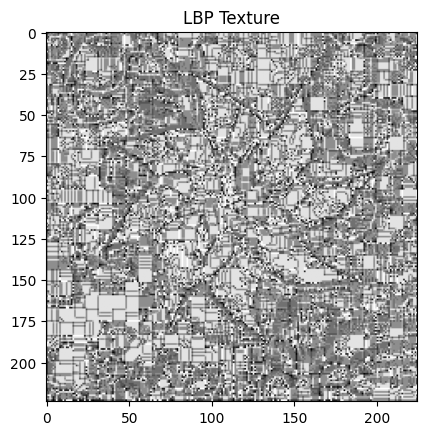

In [23]:
_, gabor_img = gabor(gray_img, frequency=1.0, theta=0.8)
lbp_img = local_binary_pattern(gray_img, P=8, R=1, method='uniform')

plt.imshow(gabor_img, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Texture')
plt.show()

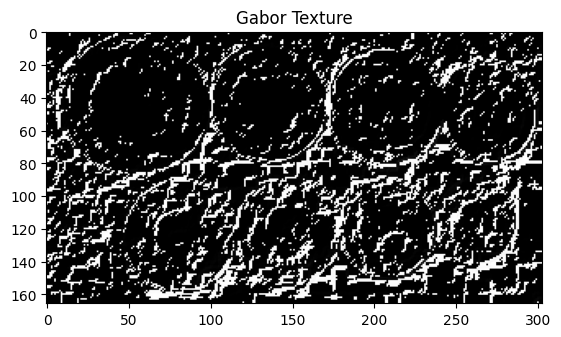

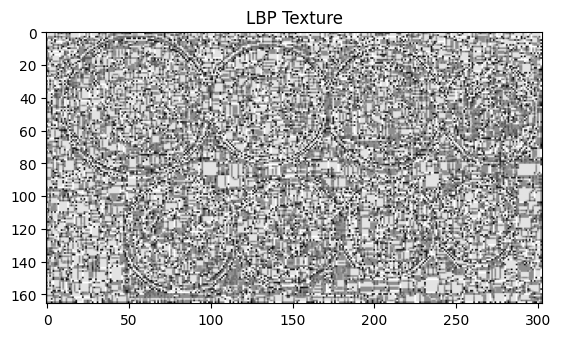

In [24]:
_, gabor_img_1 = gabor(gray_img_1, frequency=1.0, theta=0.8)
lbp_img_1 = local_binary_pattern(gray_img_1, P=8, R=1, method='uniform')

plt.imshow(gabor_img_1, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img_1, cmap='gray')
plt.title('LBP Texture')
plt.show()


In [25]:
yolo = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 72.9MB/s]


In [26]:
results = yolo(img)


0: 640x640 (no detections), 98.8ms
Speed: 4.9ms preprocess, 98.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


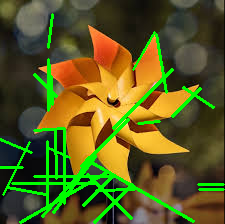

In [27]:
results[0].show()

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [29]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

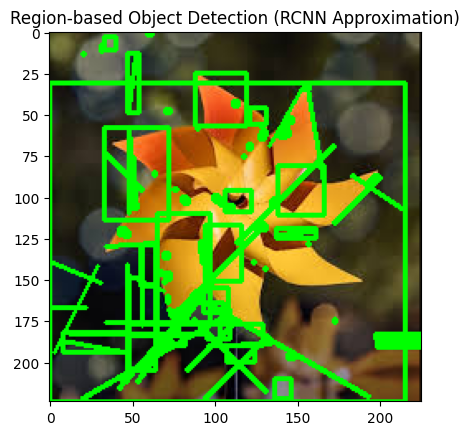

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Region-based Object Detection (RCNN Approximation)')
plt.show()